In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import itertools

from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_curve, auc

from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn import svm
from sklearn.model_selection import GridSearchCV

## Import data

In [2]:
# display options:
pd.set_option('display.max_columns', None)

# import the data into a Pandas dataframe
df = pd.read_csv("hotel_bookings_ML_data.csv", index_col=0)
df.head(10)

is_canceled  lead_time  arrival_date_week_number  \
0          0.0   0.464043                       0.5   
1          0.0   1.000000                       0.5   
2          0.0   0.009498                       0.5   
3          0.0   0.017639                       0.5   
4          0.0   0.018996                       0.5   
5          0.0   0.018996                       0.5   
6          0.0   0.000000                       0.5   
7          0.0   0.012212                       0.5   
8          1.0   0.115332                       0.5   
9          1.0   0.101764                       0.5   

   arrival_date_day_of_month  stays_in_weekend_nights  stays_in_week_nights  \
0                        0.0                      0.0                  0.00   
1                        0.0                      0.0                  0.00   
2                        0.0                      0.0                  0.02   
3                        0.0                      0.0                  0.02   
4                        0.0                      0.0                  0.04   
5                        0.0                      0.0                  0.04   
6                        0.0                      0.0                  0.04   
7                        0.0                      0.0                  0.04   
8                        0.0                      0.0                  0.06   
9                        0.0                      0.0                  0.06   

     adults  children  babies  is_repeated_guest  previous_cancellations  \
0  0.036364       0.0     0.0                0.0                     0.0   
1  0.036364       0.0     0.0                0.0                     0.0   
2  0.018182       0.0     0.0                0.0                     0.0   
3  0.018182       0.0     0.0                0.0                     0.0   
4  0.036364       0.0     0.0                0.0                     0.0   
5  0.036364       0.0     0.0                0.0                     0.0   
6  0.036364       0.0     0.0                0.0                     0.0   
7  0.036364       0.0     0.0                0.0                     0.0   
8  0.036364       0.0     0.0                0.0                     0.0   
9  0.036364       0.0     0.0                0.0                     0.0   

   previous_bookings_not_canceled  agent  company  days_in_waiting_list  \
0                             0.0    0.0      0.0                   0.0   
1                             0.0    0.0      0.0                   0.0   
2                             0.0    0.0      0.0                   0.0   
3                             0.0    1.0      0.0                   0.0   
4                             0.0    1.0      0.0                   0.0   
5                             0.0    1.0      0.0                   0.0   
6                             0.0    0.0      0.0                   0.0   
7                             0.0    1.0      0.0                   0.0   
8                             0.0    1.0      0.0                   0.0   
9                             0.0    1.0      0.0                   0.0   

        adr  required_car_parking_spaces  total_of_special_requests  hotel  \
0  0.001180                          0.0                        0.0    0.0   
1  0.001180                          0.0                        0.0    0.0   
2  0.015053                          0.0                        0.0    0.0   
3  0.015053                          0.0                        0.0    0.0   
4  0.019307                          0.0                        0.2    0.0   
5  0.019307                          0.0                        0.2    0.0   
6  0.020972                          0.0                        0.0    0.0   
7  0.020232                          0.0                        0.2    0.0   
8  0.016347                          0.0                        0.2    0.0   
9  0.020694                          0.0                        0.0    0.0   

   ar

## Data split

In [3]:
X,y = df.drop('is_canceled',1), df['is_canceled']
X.head()

lead_time  arrival_date_week_number  arrival_date_day_of_month  \
0   0.464043                       0.5                        0.0   
1   1.000000                       0.5                        0.0   
2   0.009498                       0.5                        0.0   
3   0.017639                       0.5                        0.0   
4   0.018996                       0.5                        0.0   

   stays_in_weekend_nights  stays_in_week_nights    adults  children  babies  \
0                      0.0                  0.00  0.036364       0.0     0.0   
1                      0.0                  0.00  0.036364       0.0     0.0   
2                      0.0                  0.02  0.018182       0.0     0.0   
3                      0.0                  0.02  0.018182       0.0     0.0   
4                      0.0                  0.04  0.036364       0.0     0.0   

   is_repeated_guest  previous_cancellations  previous_bookings_not_canceled  \
0                0.0                     0.0                             0.0   
1                0.0                     0.0                             0.0   
2                0.0                     0.0                             0.0   
3                0.0                     0.0                             0.0   
4                0.0                     0.0                             0.0   

   agent  company  days_in_waiting_list       adr  \
0    0.0      0.0                   0.0  0.001180   
1    0.0      0.0                   0.0  0.001180   
2    0.0      0.0                   0.0  0.015053   
3    1.0      0.0                   0.0  0.015053   
4    1.0      0.0                   0.0  0.019307   

   required_car_parking_spaces  total_of_special_requests  hotel  \
0                          0.0                        0.0    0.0   
1                          0.0                        0.0    0.0   
2                          0.0                        0.0    0.0   
3                          0.0                        0.0    0.0   
4                          0.0                        0.2    0.0   

   arrival_date_month      meal  res_status_month  res_status_day  \
0            0.545455  0.666667          0.545455        0.000000   
1            0.545455  0.666667          0.545455        0.000000   
2            0.545455  0.666667          0.545455        0.033333   
3            0.545455  0.666667          0.545455        0.033333   
4            0.545455  0.666667          0.545455        0.066667   

   mar_seg_Aviation  mar_seg_Complementary  mar_seg_Corporate  mar_seg_Direct  \
0               0.0                    0.0                0.0             1.0   
1               0.0                    0.0                0.0             1.0   
2               0.0                    0.0                0.0             1.0   
3               0.0                    0.0                1.0             0.0   
4               0.0                    0.0                0.0             0.0   

   mar_seg_Groups  mar_seg_Offline TA/TO  mar_seg_Online TA  \
0             0.0                    0.0                0.0   
1             0.0                    0.0                0.0   
2             0.0                    0.0                0.0   
3             0.0                    0.0                0.0   
4             0.0                    0.0                1.0   

   dist_ch_Corporate  dist_ch_Direct  dist_ch_GDS  dist_ch_TA/TO  res_room_A  \
0                0.0             1.0          0.0            0.0         0.0   
1                0.0             1.0          0.0            0.0         0.0   
2                0.0             1.0          0.0            0.0         1.0   
3                1.0             0.0          0.0            0.0         1.0   
4                0.0             0.0          0.0            1.0         1.0   

   res_room_B  res_room_C  res_room_D  res_room_E  res_room_F  res_room_G  \
0         0.0         1.0         0.0         0.0         0

In [4]:
# dividing the dataset into training (X_train, y_train), validation (X_val, y_val) and testing (X_test,y_test) data

Xt, X_test, yt, y_test = train_test_split(X,y,test_size=0.1,train_size=0.9, random_state = 1234)
X_train, X_val, y_train, y_val = train_test_split(Xt,yt,test_size = 0.11,train_size =0.89, random_state = 5678)

print('Size of X_train: {} ({:2.2f}%)'.format(X_train.shape[0], 100*round(X_train.shape[0]/X.shape[0],3)))
print('Size of X_val: {} ({:2.2f}%)'.format(X_val.shape[0], 100*round(X_val.shape[0]/X.shape[0],3)))
print('Size of X_test: {} ({:2.2f}%)'.format(X_test.shape[0], 100*round(X_test.shape[0]/X.shape[0],3)))

Size of X_train: 95482 (80.10%)
Size of X_val: 11802 (9.90%)
Size of X_test: 11921 (10.00%)


## Build Random forest model

In [5]:
# Create classifier
base_model = RandomForestClassifier(criterion = "gini", random_state = 1234, min_samples_leaf=3, n_estimators=100)

# Train the model using training set
base_model.fit(X_train, y_train)

# Predict labels
y_pred = base_model.predict(X_val)
y_predProb = base_model.predict_proba(X_val)
acc = 100*accuracy_score(y_val, y_pred) 

print('Accuracy = {:0.5f}%.'.format(acc))

Accuracy = 94.40773%.


## Model assessment

In [6]:
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylim([1.5, -0.5]) #added to fix a bug that causes the matrix to be squished
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

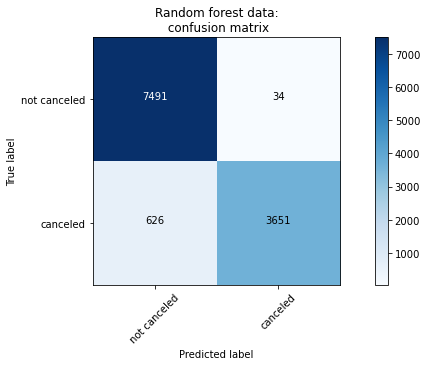

In [7]:
# Compute confusion matrix
class_names = ['not canceled', 'canceled']
cnf_matrix = confusion_matrix(y_val, y_pred)
np.set_printoptions(precision=2)
plt.figure(figsize=(10, 5))

#Plot Random forest confusion matrix
plot_confusion_matrix(cnf_matrix, classes=class_names, normalize=False,
                      title='Random forest data:\n confusion matrix')

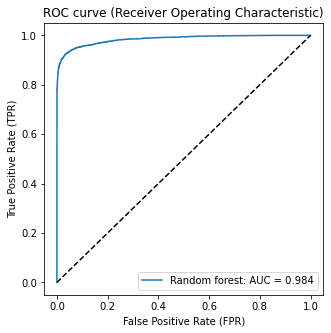

In [8]:
plt.figure(figsize=(5,5))

for test, pred, name in zip([y_val], [y_predProb[:,1]], ['Random forest']):
    fpr, tpr, _ = roc_curve(test, pred)
    roc_auc = auc(fpr, tpr)
    plt.plot(fpr, tpr, label='{}: AUC = {}'.format(name, round(roc_auc, 3)))
    plt.legend(loc='best')
    plt.plot([0,1],[0,1],color='black', linestyle='--')

plt.title('ROC curve (Receiver Operating Characteristic)')    
plt.ylabel('True Positive Rate (TPR)')
plt.xlabel('False Positive Rate (FPR)')

plt.show()

## Feature importance based on mean decrease in impurity

In [9]:
# List of features
features = df.drop('is_canceled', axis = 1)
feature_list = list(features.columns)

# Get numerical feature importances
importances = list(base_model.feature_importances_)

# List of tuples with variable and importance
feature_importances = [(feature, round(importance, 3)) for feature, importance in zip(feature_list, importances)]

# Sort the feature importances by most important first
feature_importances = sorted(feature_importances, key = lambda x: x[1], reverse = True)

# Print out the feature and importances 
[print('Feature: {:30} Importance: {}'.format(*pair)) for pair in feature_importances];

Feature: dep_type_Non Refund            Importance: 0.107
Feature: res_status_month               Importance: 0.103
Feature: dep_type_No Deposit            Importance: 0.097
Feature: lead_time                      Importance: 0.089
Feature: arrival_date_week_number       Importance: 0.075
Feature: res_status_day                 Importance: 0.065
Feature: arrival_date_day_of_month      Importance: 0.056
Feature: arrival_date_month             Importance: 0.055
Feature: total_of_special_requests      Importance: 0.051
Feature: previous_cancellations         Importance: 0.05
Feature: adr                            Importance: 0.045
Feature: required_car_parking_spaces    Importance: 0.023
Feature: mar_seg_Online TA              Importance: 0.023
Feature: stays_in_week_nights           Importance: 0.018
Feature: cust_type_Transient            Importance: 0.018
Feature: mar_seg_Groups                 Importance: 0.016
Feature: mar_seg_Offline TA/TO          Importance: 0.014
Feature: cust_t

# Drop not important features

In [10]:
X2,y2 = df[['res_status_month', 'lead_time', 'res_status_day', 'dep_type_Non Refund', 'dep_type_No Deposit', 'arrival_date_week_number', 'arrival_date_day_of_month', 'adr', 'total_of_special_requests', 'previous_cancellations', 'stays_in_week_nights', 'mar_seg_Online TA', 'required_car_parking_spaces', 'stays_in_weekend_nights', 'cust_type_Transient']], df['is_canceled']
X2.head()

res_status_month  lead_time  res_status_day  dep_type_Non Refund  \
0          0.545455   0.464043        0.000000                  0.0   
1          0.545455   1.000000        0.000000                  0.0   
2          0.545455   0.009498        0.033333                  0.0   
3          0.545455   0.017639        0.033333                  0.0   
4          0.545455   0.018996        0.066667                  0.0   

   dep_type_No Deposit  arrival_date_week_number  arrival_date_day_of_month  \
0                  1.0                       0.5                        0.0   
1                  1.0                       0.5                        0.0   
2                  1.0                       0.5                        0.0   
3                  1.0                       0.5                        0.0   
4                  1.0                       0.5                        0.0   

        adr  total_of_special_requests  previous_cancellations  \
0  0.001180                        0.0                     0.0   
1  0.001180                        0.0                     0.0   
2  0.015053                        0.0                     0.0   
3  0.015053                        0.0                     0.0   
4  0.019307                        0.2                     0.0   

   stays_in_week_nights  mar_seg_Online TA  required_car_parking_spaces  \
0                  0.00                0.0                          0.0   
1                  0.00                0.0                          0.0   
2                  0.02                0.0                          0.0   
3                  0.02                0.0                          0.0   
4                  0.04                1.0                          0.0   

   stays_in_weekend_nights  cust_type_Transient  
0                      0.0                  1.0  
1                      0.0                  1.0  
2                      0.0                  1.0  
3                      0.0                  1.0  
4                      0.0                  1.0

In [11]:
# dividing the dataset into training (X_train, y_train), validation (X_val, y_val) and testing (X_test,y_test) data

Xt2, X_test2, yt2, y_test2 = train_test_split(X2,y2,test_size=0.1,train_size=0.9, random_state = 1234)
X_train2, X_val2, y_train2, y_val2 = train_test_split(Xt2,yt2,test_size = 0.11,train_size =0.89, random_state = 5678)

print('Size of X_train2: {} ({:2.2f}%)'.format(X_train2.shape[0], 100*round(X_train2.shape[0]/X2.shape[0],3)))
print('Size of X_val2: {} ({:2.2f}%)'.format(X_val2.shape[0], 100*round(X_val2.shape[0]/X2.shape[0],3)))
print('Size of X_test2: {} ({:2.2f}%)'.format(X_test2.shape[0], 100*round(X_test2.shape[0]/X2.shape[0],3)))

Size of X_train2: 95482 (80.10%)
Size of X_val2: 11802 (9.90%)
Size of X_test2: 11921 (10.00%)


In [12]:
# Create classifier
rf = RandomForestClassifier(criterion = "gini", random_state = 1234, min_samples_leaf=3, n_estimators=100)

# Train the model using training set
rf.fit(X_train2, y_train2)

# Predict labels
y_pred2 = rf.predict(X_val2)
y_predProb2 = rf.predict_proba(X_val2)
acc2 = 100*accuracy_score(y_val2, y_pred2) 

print('Accuracy = {:0.5f}%.'.format(acc2))

Accuracy = 95.96679%.


Bit of improvement compared to the base model

# Optimize the model more

In [13]:
# Create the parameter grid based on the results of random search 
param_grid = {
    'min_samples_split': [2, 3],
    'min_samples_leaf': [1, 2, 3],
    'n_estimators': [50, 100, 150]
}

# Create a based model
rf2 = RandomForestClassifier(random_state = 1234)

# Instantiate the grid search model
grid_search = GridSearchCV(estimator = rf, param_grid = param_grid, 
                          cv = 3, n_jobs = -1, verbose = 2)

In [14]:
def evaluate(model, X, y):
    y_pred = model.predict(X)
    acc = 100*accuracy_score(y, y_pred) 
    print('Accuracy = {:0.5f}%.'.format(acc))
    return acc

In [15]:
grid_search.fit(X_train2, y_train2)

print(grid_search.best_params_)

best_grid = grid_search.best_estimator_

grid_accuracy = evaluate(best_grid, X_val2, y_val2)


Fitting 3 folds for each of 18 candidates, totalling 54 fits
{'min_samples_leaf': 1, 'min_samples_split': 3, 'n_estimators': 100}
Accuracy = 96.96662%.


In [18]:
y_pred3 = best_grid.predict(X_val2)

## Accuracy

In [16]:
accuracy = evaluate(best_grid, X_test2, y_test2)

Accuracy = 96.65297%.


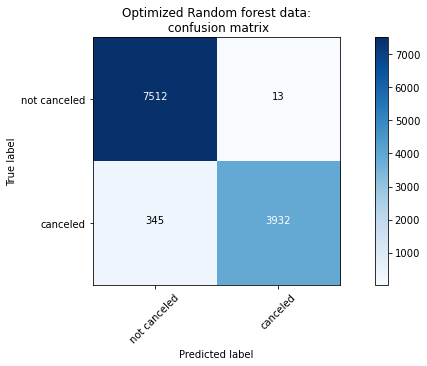

In [19]:
# Compute confusion matrix
class_names = ['not canceled', 'canceled']
cnf_matrix_rf = confusion_matrix(y_val2, y_pred3)
np.set_printoptions(precision=2)
plt.figure(figsize=(10, 5))

#Plot Random forest confusion matrix
plot_confusion_matrix(cnf_matrix_rf, classes=class_names, normalize=False,
                      title='Optimized Random forest data:\n confusion matrix')